<a href="https://colab.research.google.com/github/Han860207/decision_tree_to_estimate_real_estate_price/blob/main/stock_price_prediction_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
from keras import Sequential
from keras.layers import LSTM ,Input,Dense
from keras.models import Model 
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [148]:
data = pd.read_csv('2330_history.csv')
old_data = data[data.Date <'2018/01/01'].Close.values
new_data = data[data.Date >='2018/01/01'].Close.values

In [149]:
old_data= old_data.reshape(-1,1)
new_data = new_data.reshape(-1,1)
mms = MinMaxScaler()
old_data = mms.fit_transform(old_data)
old_data
new_data = mms.fit_transform(new_data)



In [150]:
train_x = []
train_y = []
test_x = []
test_y = []
for i in range(10,len(old_data)):
    train_x.append(old_data[i-10:i-1,0])
    train_y.append(old_data[i,0])
for i in range(10,len(new_data)):
    test_x.append(new_data[i-10:i-1,0])
    test_y.append(new_data[i,0])
train_x.reverse()
train_y.reverse()
test_x.reverse()
test_y.reverse()
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)
train_x = train_x.reshape((train_x.shape[0],train_x.shape[1],1))
train_y = train_y.reshape((train_y.shape[0],1))


In [151]:
input_layer = Input((9,1))

In [152]:
hidden1 = LSTM(100,batch_input_shape=(3,train_x.shape[0],3),return_sequences=False)(input_layer)

In [153]:
output_layer = Dense(1)(hidden1)

In [154]:
model = Model(inputs= input_layer , outputs = output_layer)

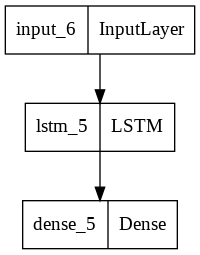

In [155]:
plot_model(model)

In [156]:
model.compile(loss = 'mse',optimizer='adam')

In [ ]:
history= model.fit(train_x,train_y,epochs=100,batch_size=16)

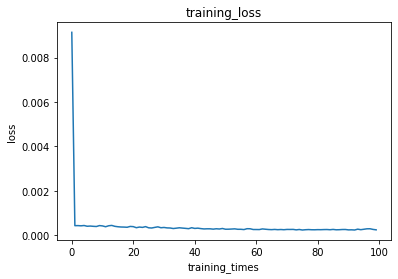

In [158]:
import matplotlib.pyplot as plt
plt.title('training_loss')
plt.xlabel('training_times')
plt.ylabel('loss')
plt.plot(history.history['loss'])

In [160]:
pred = model.predict(test_x)

In [161]:
pred = mms.inverse_transform(pred)

In [174]:
eva = model.evaluate(test_x,test_y)
eva

31/31 [==============================] - 0s 3ms/step - loss: 3.8398e-04


0.0003839809796772897

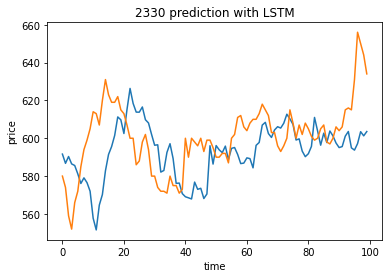

In [175]:
origin = data[data.Date >='2018/01/01'].Close.values
origin = np.flip(origin)
plt.title('2330 prediction with LSTM')
plt.xlabel('time')
plt.ylabel('price')
plt.plot(pred[-100:])
plt.plot(origin[-100:])